In [2]:
import shapefile
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import geopandas as gpd
import sklearn
import scipy.interpolate
import rpy2
import os
os.environ['R_HOME'] = 'C:\ProgramData\Anaconda3\Lib\R'
%load_ext rpy2.ipython
# from notebook.services.config import ConfigManager
# cm = ConfigManager().update('notebook', {'limit_output': 10})

C:\ProgramData\Anaconda3\lib\site-packages\rpy2\robjects\packages.py:366: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [15]:
# Load teh data using geopandas
gdf_lagoon = gpd.read_file('../Data/ki_tarawa_mbes_bathy_lagoon_20m_grid.shp')
gdf_ocean = gpd.read_file('../Data/ki_tarawa_ocean_side_mbes_bathy_20m_grid.shp')

# convert the geopandas to pandas
df_lagoon = pd.DataFrame(gdf_lagoon)
df_ocean = pd.DataFrame(gdf_ocean)

# # Sample the data to make it faster....
# df_ocean = df_ocean.sample(1000)
# df_lagoon = df_lagoon.sample(1000)

# Convert the data to float
df_ocean = df_ocean[['X','Y','A']].astype({'X':float,'Y':float,'A':float})
df_lagoon = df_lagoon[['X','Y','A']].astype({'X':float,'Y':float,'A':float})

# Combine the dataframes
df_bath = df_ocean.append(df_lagoon)

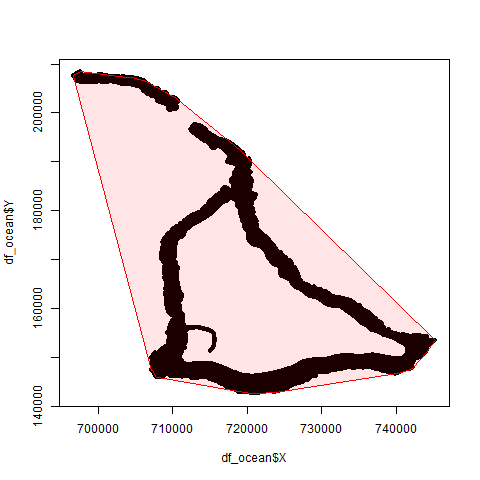

In [20]:
%%R -i df_ocean

plot(x=df_ocean$X,y=df_ocean$Y, pch=20)

##  Now get the polygons
ConvexHull = chull(df_ocean$X, df_ocean$Y)
polygon(df_ocean[ConvexHull,], 
    border=rainbow(4)[1], col=rainbow(4, alpha=0.1)[1])

 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2 
27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 
 2  2  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3 
53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 
 3  3  3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4 
